### Introduction


**Probelm Statement:** Make a classifier which takes in a job description and gives the department name for it.
*   Use a neural network model
*   Make use of a pre-trained Word Embeddings (example: Word2Vec, GloVe, etc.)
*   Calculate the accuracy on a test set (data not used to train the model)

**Problem Solving Approach:** 
_Provide a brief description of steps you followed for solving this problem_
1. Importing necessary libraries.
2. Merging all the Json files and storing in the list and converting to a csv file.
3. Merging the two csv files on ID.
4. Data Cleaning is done like removing punctuations, removing stopwords and preparing a corpus.
5. Preparing a vectorized text and spliting data into test and train.
6. Preparing a model with one hidden layer and fitting it.

### Part I: Text Preprocessing

_Include all text preprocesing steps like processing of json,csv files & data cleaning in this part._

Import neccessary packages in below cell

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
# Merging Json files
import glob
import json

result = []
for f in glob.glob("data\docs\*.json"):
    with open(f, "rb") as infile:
        result.append(json.load(infile))

In [3]:
# Taking Id and Description from resultant list and storing it in two different lists
id_ac = []
desc = []
for i in range(len(result)):
    test_dict = result[i]
    actual = [(k, test_dict[k]) for k in test_dict]
    id_ac.append(actual[-1][1])
    get_desc = actual[-2][-1].get('description')
    desc.append(get_desc)

In [4]:
# Converting to csv file
res = {'Document ID': id_ac, 'Description': desc}
df = pd.DataFrame(res)
df.to_csv('file1.csv', index = False)

In [5]:
df = pd.read_csv('file1.csv')

In [6]:
df_actual = pd.read_csv('data\document_departments.csv')

In [7]:
# Merging the two csv files on ID
merged_df = df_actual.merge(df, on='Document ID')

In [8]:
merged_df

,Document ID,Department,Description
0,8196431,Customer service,Designation- TeleMarketing ExecutiveKeyskills-...
1,8278123,Digital Marketing,We need committed &amp; result-oriented people...
2,8331625,Sales,Greetings from Akkam Immigrations!!!Immediate ...
3,8331003,Back office ticketing,"Dear Candidates,Greetings From Continental Imm..."
4,8277939,Digital Marketing,We need committed &amp; result-oriented people...
...,...,...,...
1157,8366382,Administration,NaN
1158,8370153,Sales,ANTILOG VACATIONis hiring both fresher and exp...
1159,8388313,Ticketing,"Dear Candidates,Get financial freedom by doing..."
1160,8389315,Sales,Job DescriptionKey Responsibilities of the rol...


In [9]:
merged_df.isnull().sum()

Document ID      0
Department       0
Description    417
dtype: int64

In [10]:
merged_df.dropna(inplace=True)

In [11]:
merged_df.isnull().sum()

Document ID    0
Department     0
Description    0
dtype: int64

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 1161
Data columns (total 3 columns):
Document ID    745 non-null int64
Department     745 non-null object
Description    745 non-null object
dtypes: int64(1), object(2)
memory usage: 23.3+ KB


In [13]:
# Removing punctuation and stopwords from description
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, merged_df.shape[0]):
    description = re.sub('[^a-zA-Z]', ' ', merged_df.iloc[i , 2])
    description = description.lower()
    description = description.split()
    description = [ps.stem(word) for word in description if not word in set(stopwords.words('english'))]
    description = ' '.join(description)
    corpus.append(description)

In [14]:
corpus

['design telemarket executivekeyskil commun sale outbound process call domest bpo call center custom handl voic processeduc hsc pass fresher also welcomeloc pune navi mumbai vashi mumbai goregaon ahmadabadsalari depend candid contac thanx amp regardshr sonali',
 'need commit amp result orient peopl join hand us amp contribut promot earn huge benefit form incom weekli monthli come amp work target sell work pressur time boundat amp boss environ natur busi nbsp promot tourism nbsp servic incom nbsp earn rs per month benefit nbsp time bound skill requir call what app nbsp',
 'greet akkam immigr immedi requir sr immigr consult immigr consult ndash excel learn environ great opportun posit immigr consult sr immigr consult job locat mumbai amritsarexp requir yearsjob descript excel commun skill must pleas person interest candid send resum jaweeria akkam nbsp thank regard jaweeria khan nbsp crocontact whatsapp nbsp www akkam inwww akkamimmigr com nbsp',
 'dear candid greet continent immigr imme

### Part II: Exploratoty Data Analysis

_Include EDA steps like finding distribution of Departments in this part, you may also use plots for EDA._

In [15]:
import seaborn as sns

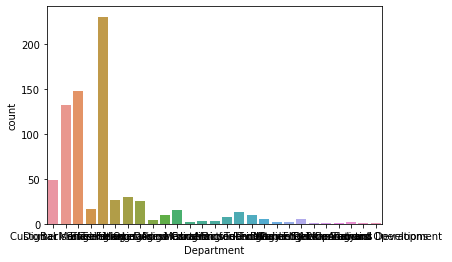

In [16]:
sns.countplot(merged_df['Department'])
plt.rcParams['figure.figsize'] = (10,10)

### Part III: Modelling & Evaluation

_Include all model prepration & evaluation steps in this part._

In [17]:
from sklearn.model_selection import train_test_split
# To count the number of text vectors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# feature extraction - TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [18]:
# Converting to vectorized text
cv = CountVectorizer(max_features= 1500)
x = cv.fit_transform(corpus).toarray()

In [19]:
y = merged_df.iloc[:, 1].values
y

array(['Customer service', 'Digital Marketing', 'Sales',
       'Back office ticketing', 'Digital Marketing', 'Digital Marketing',
       'Digital Marketing', 'Ticketing', 'Ticketing', 'Ticketing',
       'Finance', 'Digital Marketing', 'Sales', 'Digital Marketing',
       'Digital Marketing', 'Digital Marketing', 'Ticketing',
       'Digital Marketing', 'Digital Marketing', 'Customer service',
       'Digital Marketing', 'Ticketing', 'Ticketing', 'Digital Marketing',
       'Sales', 'Sales', 'Digital Marketing', 'Ticketing', 'Marketing',
       'Ticketing', 'Digital Marketing', 'Customer service',
       'Customer service', 'Digital Marketing', 'Ticketing', 'Ticketing',
       'Ticketing', 'Back office ticketing', 'Back office ticketing',
       'Digital Marketing', 'Ticketing', 'Finance', 'Customer service',
       'Digital Marketing', 'Digital Marketing', 'Ticketing', 'Sales',
       'Ticketing', 'Finance', 'Ticketing', 'Operations', 'Marketing',
       'Customer service', 'Engineer

In [20]:
# Converting y to binary form using labelEncoder
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

Using TensorFlow backend.


In [21]:
dummy_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [22]:
# checking the features
feat = cv.get_feature_names()

In [23]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feat))

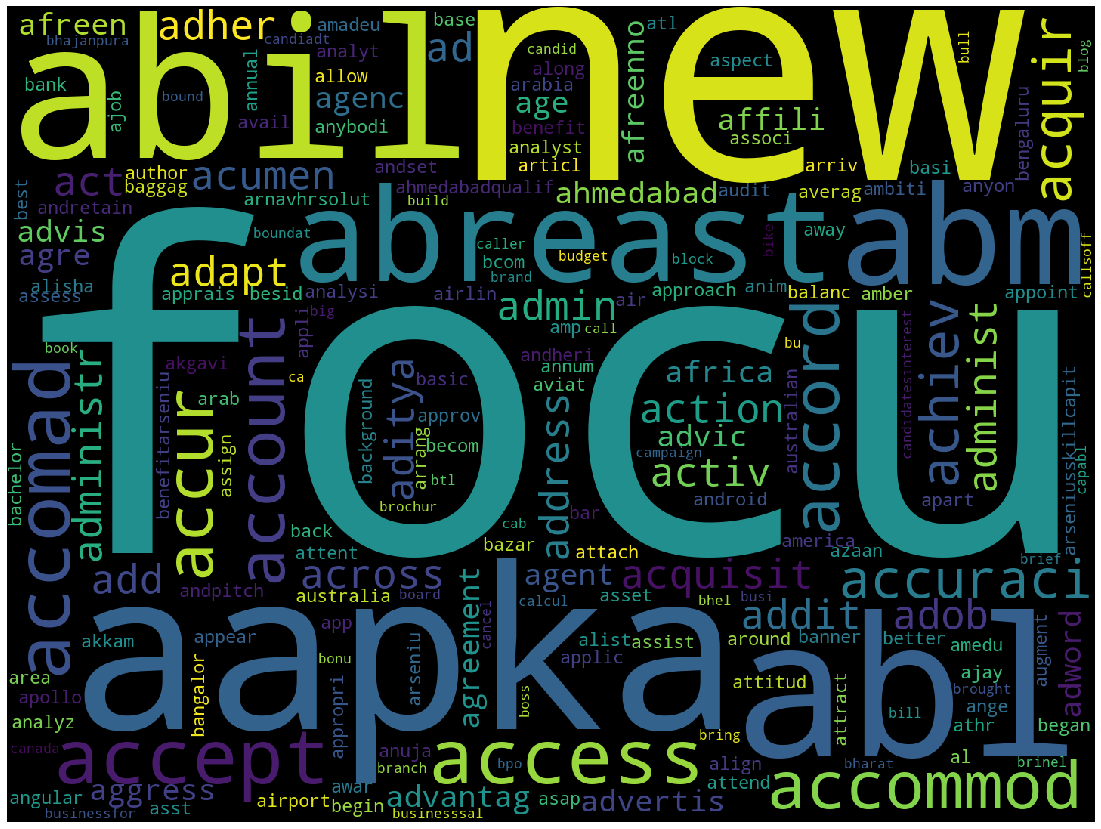

In [24]:
# larger the size of the word, more the times it appears
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,dummy_y, test_size=0.2, random_state = 0)

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [27]:
# Training the model
classifier = Sequential()
# Input Layer
classifier.add(Dense(output_dim = 820, init = 'uniform', activation = 'relu', input_dim = 1500))
# Hidden Layer
classifier.add(Dense(output_dim = 820, init = 'uniform', activation = 'relu'))
# Output Layer
classifier.add(Dense(output_dim = 27, init = 'uniform', activation = 'softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1500, units=820, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=820, kernel_initializer="uniform")`
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=27, kernel_initializer="uniform")`
  


In [28]:
from keras.utils import to_categorical
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
596/596 [==============================] - 3s 5ms/step - loss: 1.8461 - accuracy: 0.5453
Epoch 2/100
596/596 [==============================] - 2s 4ms/step - loss: 0.9110 - accuracy: 0.7282
Epoch 3/100
596/596 [==============================] - 2s 4ms/step - loss: 0.5229 - accuracy: 0.8674
Epoch 4/100
596/596 [==============================] - 2s 4ms/step - loss: 0.2910 - accuracy: 0.9195
Epoch 5/100
596/596 [==============================] - 2s 4ms/step - loss: 0.1662 - accuracy: 0.9597
Epoch 6/100
596/596 [==============================] - 2s 3ms/step - loss: 0.1103 - accuracy: 0.9614
Epoch 7/100
596/596 [==============================] - 2s 3ms/step - loss: 0.1056 - accuracy: 0.9631
Epoch 8/100
596/596 [==============================] - 2s 4ms/step - loss: 0.0728 - accuracy: 0.9748
Epoch 9/100
596/596 [==============================] - 2s 3ms/step - loss: 0.0580 - accuracy: 0.9765
Epoch 10/100
596/596 [==============================] - 2s 3ms/step - loss: 0.0509 - accura

596/596 [==============================] - 2s 3ms/step - loss: 0.0246 - accuracy: 0.9866
Epoch 82/100
596/596 [==============================] - 2s 3ms/step - loss: 0.0246 - accuracy: 0.9866
Epoch 83/100
596/596 [==============================] - 2s 3ms/step - loss: 0.0241 - accuracy: 0.9866
Epoch 84/100
596/596 [==============================] - 2s 3ms/step - loss: 0.0243 - accuracy: 0.9866
Epoch 85/100
596/596 [==============================] - 2s 3ms/step - loss: 0.0241 - accuracy: 0.9883
Epoch 86/100
596/596 [==============================] - 2s 3ms/step - loss: 0.0243 - accuracy: 0.9866
Epoch 87/100
596/596 [==============================] - 2s 4ms/step - loss: 0.0239 - accuracy: 0.9849
Epoch 88/100
596/596 [==============================] - 2s 4ms/step - loss: 0.0241 - accuracy: 0.9849
Epoch 89/100
596/596 [==============================] - 2s 4ms/step - loss: 0.0240 - accuracy: 0.9849
Epoch 90/100
596/596 [==============================] - 2s 3ms/step - loss: 0.0235 - accuracy: 

In [29]:
y_test_test = []
for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        if (y_test[i][j] == 1):
            y_test_test.append(j)

In [30]:
y_test_test

[26,
 8,
 7,
 5,
 24,
 5,
 24,
 26,
 24,
 26,
 26,
 26,
 15,
 7,
 26,
 26,
 24,
 26,
 0,
 7,
 26,
 7,
 5,
 26,
 26,
 26,
 7,
 5,
 14,
 18,
 26,
 26,
 26,
 26,
 26,
 11,
 24,
 26,
 26,
 7,
 7,
 5,
 7,
 7,
 26,
 26,
 26,
 24,
 26,
 7,
 24,
 24,
 24,
 0,
 14,
 26,
 24,
 19,
 26,
 26,
 7,
 24,
 26,
 5,
 24,
 5,
 26,
 19,
 6,
 24,
 0,
 5,
 26,
 24,
 22,
 24,
 5,
 5,
 9,
 25,
 7,
 7,
 18,
 26,
 24,
 19,
 7,
 26,
 24,
 26,
 9,
 26,
 9,
 26,
 18,
 24,
 24,
 20,
 24,
 24,
 23,
 24,
 24,
 24,
 26,
 25,
 7,
 19,
 7,
 9,
 7,
 24,
 26,
 26,
 5,
 7,
 26,
 26,
 26,
 7,
 26,
 26,
 11,
 24,
 3,
 11,
 9,
 23,
 22,
 24,
 5,
 19,
 26,
 5,
 24,
 5,
 24,
 26,
 7,
 7,
 11,
 26,
 24,
 9,
 9,
 5,
 24,
 26,
 0]

In [31]:
predicted = classifier.predict(x_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test_test, predicted)

0.697986577181208

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_test, predicted))

[[ 1  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  1  0  0  0  0  0  1  0  0  0  0  0  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  3  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0 21  1  8]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0

# Results

1. We achieve an accuracy of 69.8 percent.

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test_test, predicted))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           3       0.50      1.00      0.67         1
           5       1.00      0.40      0.57        15
           6       0.00      0.00      0.00         1
           7       0.81      1.00      0.89        21
           8       0.00      0.00      0.00         1
           9       0.83      0.71      0.77         7
          11       0.60      0.75      0.67         4
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         1
          18       0.33      0.33      0.33         3
          19       0.75      0.60      0.67         5
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          24       0.81      0.68      0.74        31
          25       0.33      0.50      0.40         2
          26       0.62    

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
